In [33]:
import matplotlib.pyplot as plt
import pandas as pd

In [35]:
def plot_output_csv(filename, output_filename, save_it_or_not):
    df = pd.read_csv(filename)
    matrix_size = df['matrix size']
    GFLOPS_s = df['GFLOPS/s']
    parallel_GFLOPs = df['parallel_GFLOP/s']

    plt.figure(figsize=(10, 6))
    plt.plot(matrix_size, GFLOPS_s, marker='o', label='GFLOPS/s')
    plt.plot(matrix_size, parallel_GFLOPs, marker='s', label='parallel_GFLOP/s')
    plt.xlabel('Matrix Size')
    plt.ylabel('GFLOPS/s')
    plt.title('Performance Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

    if save_it_or_not:
        plt.savefig(output_filename)

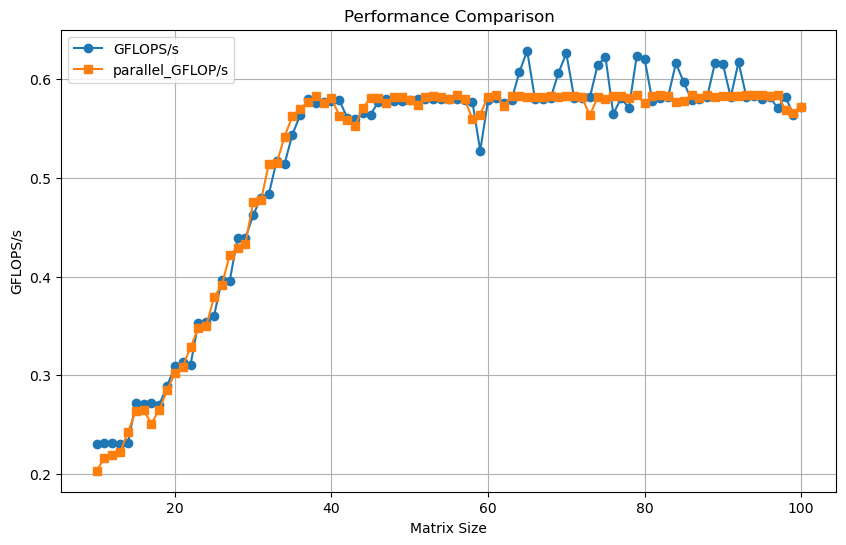

<Figure size 640x480 with 0 Axes>

In [36]:
plot_output_csv('../CSVs/MMM_output_openmp.csv', '../figures/MMM_output_openmp.png', save_it_or_not=True)

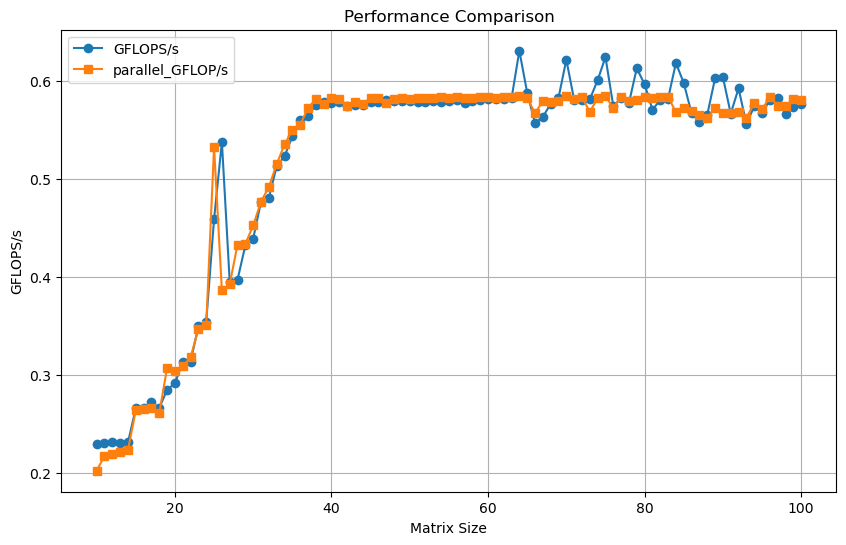

<Figure size 640x480 with 0 Axes>

In [37]:
plot_output_csv('../CSVs/MMM_output_serial.csv', '../figures/MMM_output_serial.png', save_it_or_not=True)

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import glob

def plot_thread_to_thread_speedup_from_folder(folder_path, output_filename, save_it_or_not):
    csv_pattern = f"{folder_path}/output_*.csv"
    files = glob.glob(csv_pattern)

    plt.figure(figsize=(10, 6))
    for file in sorted(files):
        parts = file.split('_')
        matrix_size = parts[1]
        thread_count = parts[2].split('.')[0]
        print('Reading file:', file)
        df = pd.read_csv(file)
        plt.plot(df['matrix size'], df['parallel_GFLOP/s'], marker='o', label=f'Threads: {thread_count}, Size: {matrix_size}')

    plt.xlabel('Matrix Size')
    plt.ylabel('GFLOP/s')
    plt.title('Performance Across Different Thread Counts and Matrix Sizes')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1), shadow=True, ncol=1)
    plt.grid(True)

    if save_it_or_not:
        plt.savefig(output_filename)
    else:
        plt.show()

Reading file: ../CSVs/output_1000_1.csv
Reading file: ../CSVs/output_1000_10.csv
Reading file: ../CSVs/output_1000_2.csv
Reading file: ../CSVs/output_1000_4.csv
Reading file: ../CSVs/output_1000_8.csv
Reading file: ../CSVs/output_100_1.csv
Reading file: ../CSVs/output_100_10.csv
Reading file: ../CSVs/output_100_2.csv
Reading file: ../CSVs/output_100_4.csv
Reading file: ../CSVs/output_100_8.csv
Reading file: ../CSVs/output_20_1.csv
Reading file: ../CSVs/output_20_10.csv
Reading file: ../CSVs/output_20_2.csv
Reading file: ../CSVs/output_20_4.csv
Reading file: ../CSVs/output_20_8.csv


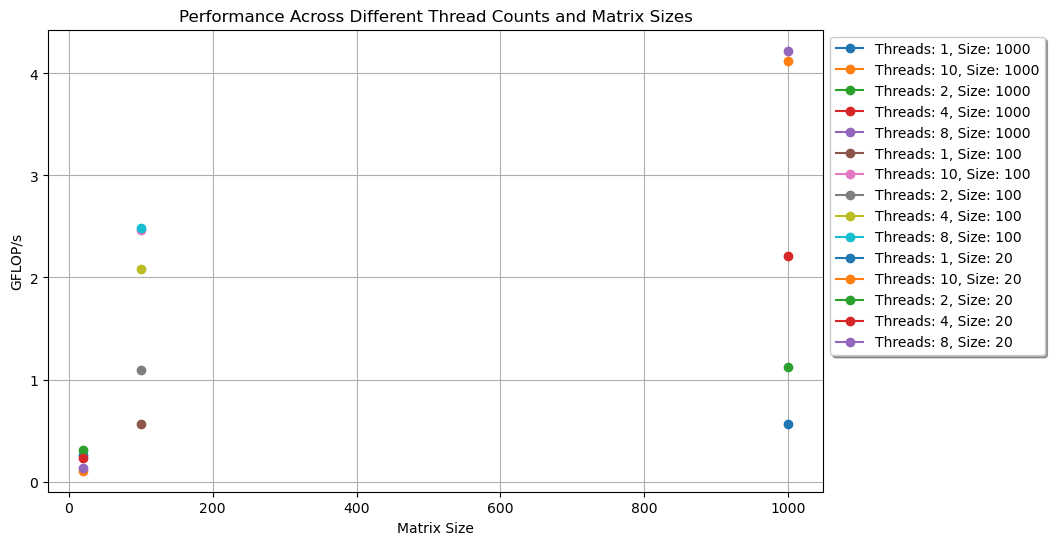

In [41]:
folder_path = '../CSVs'
output_filename = '../figures/TTT_performance_comparison.png'
plot_thread_to_thread_speedup_from_folder(folder_path, output_filename, save_it_or_not=True)

In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import os

def plot_times_to_solution(folder_path, matrix_sizes, thread_counts, output_folder, save_it_or_not):
    for size in matrix_sizes:
        times = []
        for threads in thread_counts:
            filename = f'output_{size}_{threads}.csv'
            filepath = os.path.join(folder_path, filename)
            if os.path.exists(filepath):
                df = pd.read_csv(filepath)
                # Assuming the structure has columns ['matrix size', 'GFLOPS/s', 'parallel_GFLOP/s']
                # and that 'parallel_GFLOP/s' is a proxy for time-to-solution
                time = df['parallel_GFLOP/s'].iloc[0]
                times.append(time)
            else:
                print(f'File {filepath} not found.')
                times.append(None)

        # Plot the data
        plt.figure(figsize=(10, 6))
        plt.plot(thread_counts, times, '-o', label=f'Matrix Size: {size}')
        plt.xlabel('Thread Count')
        plt.ylabel('Time-to-Solution (s)')
        plt.title(f'Time-to-Solution for Matrix Size: {size}')
        plt.legend()
        plt.grid(True)
        
        if save_it_or_not:
            output_filename = f'time_to_solution_{size}.png'
            output_filepath = os.path.join(output_folder, output_filename)
            plt.savefig(output_filepath)
            print(f'Plot saved to {output_filepath}')
        else:
            plt.show()
        plt.close()

In [32]:
folder_path = '../CSVs'
matrix_sizes = [20, 100, 1000]
thread_counts = [1, 2, 4, 8, 10]
output_folder = '../figures'
plot_times_to_solution(folder_path, matrix_sizes, thread_counts, output_folder, save_it_or_not=True)

Plot saved to ../figures/time_to_solution_20.png
Plot saved to ../figures/time_to_solution_100.png
Plot saved to ../figures/time_to_solution_1000.png
